DATASET : [WATER POTABILITY](https://www.kaggle.com/datasets/adityakadiwal/water-potability/data)

# IMPORTAMOS LIBRERIAS

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CARGAMOS EL DATASET

In [36]:
df = pd.read_csv('/content/water_potability.csv')
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.shape

(3276, 10)

In [4]:
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


# SEPARAMOS DF EN VARIABLES DEPENDIENTES E INDEPENDIENTES

In [37]:
X = df.iloc[:,0:9].values
y = df.iloc[:,9].values
print(X)
print(y)

[[           nan 2.04890455e+02 2.07913190e+04 ... 1.03797831e+01
  8.69909705e+01 2.96313538e+00]
 [3.71608008e+00 1.29422921e+02 1.86300579e+04 ... 1.51800131e+01
  5.63290763e+01 4.50065627e+00]
 [8.09912419e+00 2.24236259e+02 1.99095417e+04 ... 1.68686369e+01
  6.64200925e+01 3.05593375e+00]
 ...
 [9.41951032e+00 1.75762646e+02 3.31555782e+04 ... 1.10390697e+01
  6.98454003e+01 3.29887550e+00]
 [5.12676292e+00 2.30603758e+02 1.19838694e+04 ... 1.11689462e+01
  7.74882131e+01 4.70865847e+00]
 [7.87467136e+00 1.95102299e+02 1.74041771e+04 ... 1.61403676e+01
  7.86984463e+01 2.30914906e+00]]
[0 0 0 ... 1 1 1]


#IMPUTACION DE VALORES FALTANTES

In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer = imputer.fit(X[:,0:9])
X[:,0:9] = imputer.transform(X[:,0:9])
X

array([[7.08079450e+00, 2.04890455e+02, 2.07913190e+04, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

# ESCALAMIENTO DE DATOS

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X


array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

# DIVIDIMOS DATA EN ENTRENAMIENTO Y PRUEBA

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# CREAMOS RED NEURONAL CON TENSORFLOW

In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
from tensorflow.keras.layers import Dropout

In [11]:
red = Sequential()
entrada = Dense(units=9,activation='relu')
oculta1 = Dense(units=500,activation='relu')
oculta2 = Dense(units=500,activation='relu')
salida = Dense(units=1,activation='sigmoid')

red.add(entrada)
red.add(oculta1)
red.add(Dropout(0.5))
red.add(oculta2)
red.add(salida)

red

<Sequential name=sequential, built=False>

# COMPILAMOS LA RED CON UN OPTIMIZADOR Y FUNCION DE PERDIDA

In [12]:
#tf.keras.optimizers.RMSprop(learning_rate=0.01)
red.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

# ENTRENAMOS LA RED NEURONAL

In [13]:
model1 = red.fit(X_train,y_train,batch_size=30,epochs=9)


Epoch 1/9
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5824 - loss: 0.8051
Epoch 2/9
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5937 - loss: 0.6619
Epoch 3/9
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6341 - loss: 0.6455
Epoch 4/9
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6536 - loss: 0.6321
Epoch 5/9
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6735 - loss: 0.6061
Epoch 6/9
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6820 - loss: 0.6116
Epoch 7/9
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6687 - loss: 0.6166
Epoch 8/9
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6917 - loss: 0.6042
Epoch 9/9
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6862 - loss: 0.6045


# EJECUTAR MANUALMENTE EL ENTRENAMIENTO DEL MODELO

In [26]:
X_train

array([[-1.06553244e+00,  9.84537823e-01,  1.52038128e+00, ...,
         1.95307979e-01, -1.24406641e+00, -1.49773516e+00],
       [-6.04313345e-16,  4.36911633e-01, -9.51574693e-01, ...,
        -1.18854871e+00, -1.33770861e+00, -7.71400235e-01],
       [-6.04313345e-16,  1.14037393e+00, -1.17598897e+00, ...,
         1.22561748e+00, -1.50428834e+00, -5.85420497e-01],
       ...,
       [-2.94468081e-01, -1.37725627e-01, -7.79927065e-01, ...,
         3.48680803e-01, -6.25585662e-01, -1.75585109e-01],
       [ 4.04916868e-01,  1.12339321e+00,  1.89228254e-01, ...,
         1.26205271e+00, -3.42648576e-01,  1.37604146e+00],
       [-6.04313345e-16, -1.07844741e+00, -9.20569590e-01, ...,
         2.79267418e-01,  5.82132720e-01,  2.23983551e-01]])

In [27]:
y_train

array([0, 1, 0, ..., 0, 0, 1])

In [42]:
# Definir el modelo
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, x):
        x = self.dense1(x)
        x = self.dense2(x)
        return self.dense3(x)

In [43]:
model = MyModel()

In [49]:
optimizer = tf.keras.optimizers.RMSprop()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

In [50]:
def train_step(x_batch, y_batch):
    with tf.GradientTape() as tape:
        # Propagación capa por capa
        activations = []
        x = x_batch
        activations.append(model.dense1(x))
        activations.append(model.dense2(activations[-1]))
        output = model.dense3(activations[-1])

        # Calcular la pérdida total
        total_loss = loss_fn(y_batch, output)

        # Calcular la pérdida en cada capa (basada en la salida parcial de cada capa)
        for i, activation in enumerate(activations):
            partial_loss = loss_fn(y_batch, activation)
            print(f"Pérdida después de la capa {i+1}: {partial_loss.numpy()}")

        # Calcular el gradiente y actualizar los pesos
        gradients = tape.gradient(total_loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    return total_loss

In [51]:
# Entrenar el modelo
def train_model(x_train, y_train, epochs):
    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1}/{epochs}")
        total_loss = train_step(x_train, y_train)
        print(f"Pérdida total al final de la época {epoch + 1}: {total_loss.numpy()}")

In [52]:
train_model(X_train,y_train,epochs=9)


Epoch 1/9
Pérdida después de la capa 1: 11.462503433227539
Pérdida después de la capa 2: 6.161749839782715
Pérdida total al final de la época 1: 1.8749728202819824

Epoch 2/9
Pérdida después de la capa 1: 11.423614501953125
Pérdida después de la capa 2: 5.4575934410095215
Pérdida total al final de la época 2: 1.7053453922271729

Epoch 3/9
Pérdida después de la capa 1: 11.376911163330078
Pérdida después de la capa 2: 5.019435882568359
Pérdida total al final de la época 3: 1.5853431224822998

Epoch 4/9
Pérdida después de la capa 1: 11.34827709197998
Pérdida después de la capa 2: 4.659781455993652
Pérdida total al final de la época 4: 1.486034870147705

Epoch 5/9
Pérdida después de la capa 1: 11.325505256652832
Pérdida después de la capa 2: 4.321435928344727
Pérdida total al final de la época 5: 1.3996881246566772

Epoch 6/9
Pérdida después de la capa 1: 11.315884590148926
Pérdida después de la capa 2: 4.139617919921875
Pérdida total al final de la época 6: 1.323298692703247

Epoch 7/9
P

# GRAFICAMOS LOS VALORES DE ACCURACY Y LOSS

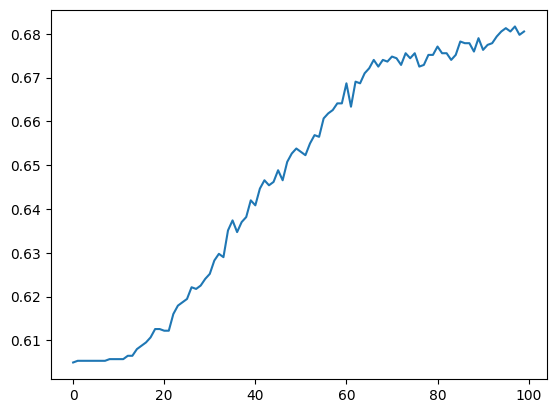

In [ ]:
plt.plot(model1.history['accuracy'])

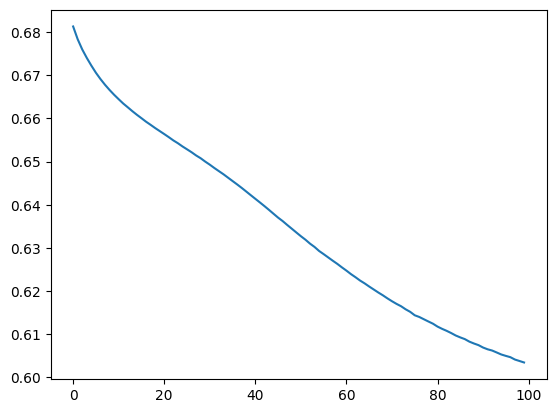

In [ ]:
plt.plot(model1.history['loss'])
plt.show()

# VALIDAMOS EL MODELO DE MI RED NEURONAL

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

y_pred = red.predict(X_test)
y_pred = np.round(y_pred)

score = accuracy_score(y_test,y_pred)
print(f'el score de validacion y predicción es {score}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
el score de validacion y predicción es 0.6905487804878049


# MATRIZ DE CONFUSION

In [ ]:
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[364,  48],
       [163,  81]])

<Figure size 1100x1100 with 0 Axes>

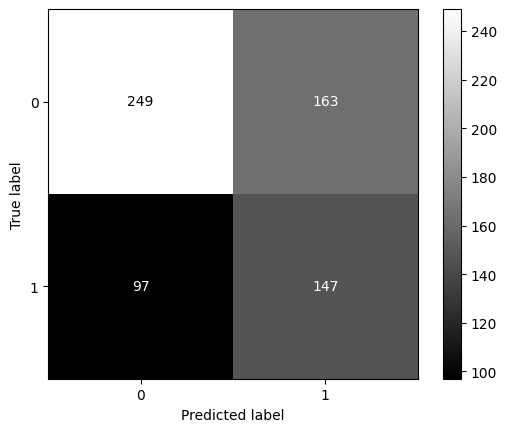

In [ ]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='gray')
plt.show()